## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
mouse_data_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [32]:
# Checking the number of mice.
mouse_data_df["Mouse ID"].value_counts()

g989    13
o331    10
n364    10
q633    10
c282    10
        ..
f932     1
n482     1
t573     1
x336     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

Note there is a possible 10 or less data point time observations for each mouse - increments of 5. Note the g989 may have duplicate observations.  Need to check: 

In [66]:
# Use a copy of the dataframe
clean_mice = mouse_data_df.copy()

In [67]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_check = clean_mice.loc[clean_mice["Mouse ID"] == "g989"]
duplicate_mouse_check.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mice = clean_mice.drop_duplicates(subset=["Mouse ID", "Timepoint"], inplace=False)

In [69]:
#Check one of the observed duplicate entries from above
duplicate_entry = clean_mice.loc[clean_mice["Mouse ID"] == "g989"]

In [71]:
#Do a check on the data to confirm the duplicate observations in mouse g989
duplicate_entry.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


Create a clean DataFrame by dropping the duplicate mouse by its ID. - clean_mice is the clean DataFrame

In [84]:
 # Checking the number of mice in the clean DataFrame (249)
clean_mice["Mouse ID"].value_counts()

o331    10
r811    10
c282    10
a818    10
c264    10
        ..
t573     1
f932     1
n482     1
x336     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
for each regimen.
This method is the most straightforward, creating multiple series and putting them all together at the end.

In [109]:
#Generate the mean calculations for each regimen
regimen_mean = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_mean.head(10)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [110]:
#Generate the median calculations for each regimen
regimen_median = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_median.head(10)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [111]:
#Generate the variance calculations for each regimen
regimen_var = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_var.head(10)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [112]:
#Generate the standard deviation calculations for each regimen
regimen_std = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_std.head(10)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [113]:
#Generate the standard deviation calculations for each regimen
regimen_sem = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
regimen_sem.head(10)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [114]:
# Group these stats into a dataframe for merger below
grouped_regimen = pd.DataFrame({"Tumor Mean": regimen_mean,
                                "Tumor Median": regimen_mean,
                                "Tumor Variance": regimen_var,
                                "Tumor Std Dev": regimen_std,
                                "Tumor SEM": regimen_sem                                 
                                    })

In [115]:
grouped_regimen

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.393463,52.393463,43.138803,6.568014,0.525862
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [118]:
#Generate the mean calculations for each regimen
regimen_sample_count = clean_mice.groupby("Drug Regimen")["Mouse ID"].nunique()
regimen_sample_count.head(10)

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

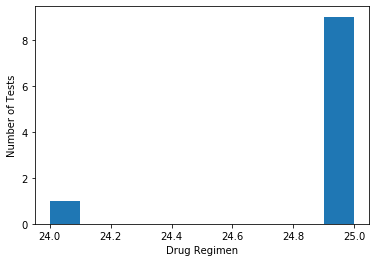

NameError: name 'sts' is not defined

In [121]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(regimen_sample_count)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Tests')
plt.show()
print(sts.normaltest(regimen_sample_count))

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
